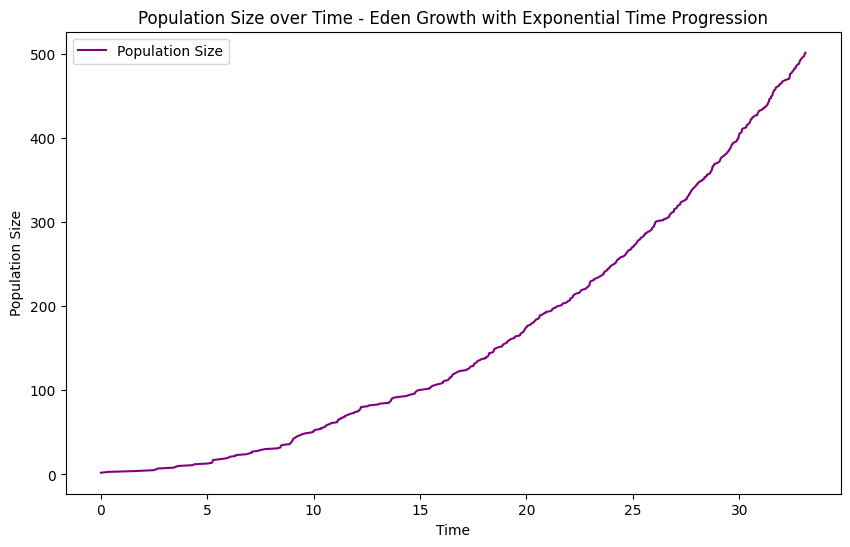

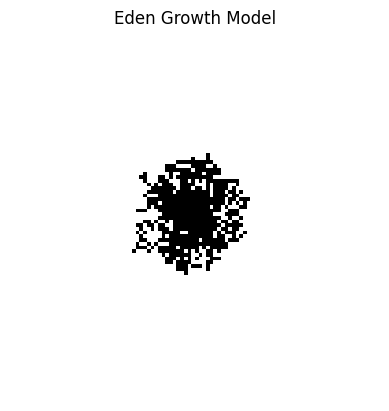

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(size):
    grid = np.zeros((size, size), dtype=int)
    center = size // 2
    grid[center, center] = 1  # Start with a single occupied cell in the center
    border = set(get_moore_neighborhood(center, center, size))
    return grid, border

def get_moore_neighborhood(x, y, size):
    neighbors = [(i, j) for i in range(x-1, x+2) for j in range(y-1, y+2) if (0 <= i < size and 0 <= j < size)]
    neighbors.remove((x, y))
    return neighbors

def grow_cluster(grid, border, iterations, growth_rate):
    size = grid.shape[0]
    population_size = []
    time_points = [0]  # Start with time zero

    for _ in range(iterations):
        if not border:
            break

        next_event_time = np.random.exponential(1 / (growth_rate * len(border)))
        time_points.append(time_points[-1] + next_event_time)

        new_site = list(border)[np.random.randint(len(border))]
        grid[new_site] = 1
        population_size.append(np.sum(grid))
        border.remove(new_site)
        
        for nx, ny in get_moore_neighborhood(*new_site, size):
            if grid[nx, ny] == 0:
                border.add((nx, ny))
    
    return grid, population_size, time_points[:-1]  # Ensure time_points and population_size have the same length

def plot_grid(grid):
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    plt.title('Eden Growth Model')
    plt.axis('off')
    plt.show()

# Parameters
grid_size = 100
iterations = 500
growth_rate = 0.1

# Run the simulation
grid, population_size, time_points = grow_cluster(*initialize_grid(grid_size), iterations, growth_rate)

# Plot population size over time
plt.figure(figsize=(10, 6))
plt.plot(time_points, population_size, label='Population Size', color='purple')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population Size over Time - Eden Growth with Exponential Time Progression')
plt.legend()
plt.show()

# Plot final grid
plot_grid(grid)
